In [1]:
import pandas as pd

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("Dataset.csv", index_col=0)
data.head()

,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,Target- LC50 [-LOG(mol/L)]
0,0.00,0.0,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.0,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.0,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.0,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.0,0,4.068,2.758,0.695,0,0,5.979


Splitting Dataset into two parts: where x represents the feature variables and y represents the target variable

In [6]:
y = data["Target- LC50 [-LOG(mol/L)]"].copy()
y.head()

0    3.740
1    4.330
2    7.019
3    6.723
4    5.979
Name: Target- LC50 [-LOG(mol/L)], dtype: float64

In [8]:
X = data.drop("Target- LC50 [-LOG(mol/L)]", axis=1)
X.head()

,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040
0,0.00,0.0,0,2.419,1.225,0.667,0,0
1,0.00,0.0,0,2.638,1.401,0.632,0,0
2,9.23,11.0,0,5.799,2.930,0.486,0,0
3,9.23,11.0,0,5.453,2.887,0.495,0,0
4,9.23,11.0,0,4.068,2.758,0.695,0,0


Now we shall scale the data. By doing this we will only scale the prediction data and not the target data. (Scale of the target data does not affect the prediction data.)

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3) 

In [12]:
len(X_train)

382

In [13]:
len(X_test)

164

In [14]:
type(X_train)

numpy.ndarray

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()

In [17]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
model.coef_

array([ 1.32329187, -1.07466857,  0.05071958,  0.74049372,  0.4793007 ,
       -0.26588129, -0.27221537, -0.03402459])

In [20]:
pred = model.predict(X_test)

In [21]:
residuals = y_test-pred

In [22]:
import matplotlib.pyplot as plt

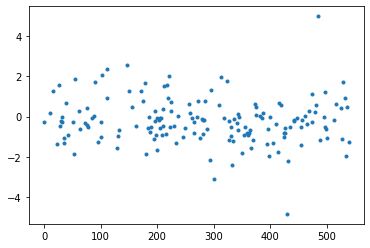

In [23]:
plt.plot(residuals, ls='', marker='.')
plt.show()

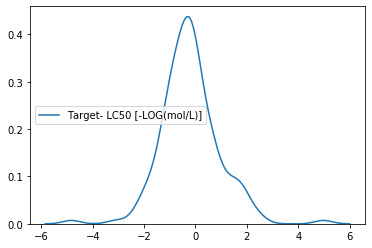

In [24]:
import seaborn as sns
sns.kdeplot(residuals)

In [25]:
model.score(X_test,y_test)

0.4146805803115949